In [ ]:
#from supervised.automl import AutoML
from sklearn.cluster import KMeans
import pandas as pd
import random
import os
#
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, TruncatedSVD, FastICA
from sklearn.cluster import KMeans
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(69)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


### Data

In [ ]:
path = '/content/gdrive/MyDrive/air'
train = pd.read_csv(f'{path}/train_data.csv')
test = pd.read_csv(f'{path}/test_data.csv')
ans = f'{path}/answer_sample.csv'

train.head()


,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [ ]:
test.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0


In [ ]:
train.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369
std,1.202328,8.725091,1.110448e-16,13.604597,687.870774,7.797152,1.576386,2.230113
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000


In [ ]:
test.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000
mean,2.103129,49.042735,0.699840,27.417935,2373.820003,65.771623,3.345523,2.957369
std,1.163998,8.686208,0.005377,13.234089,687.737182,7.741473,0.644199,2.229811
min,0.340000,32.080000,0.490000,5.370000,1200.000000,50.420000,1.970000,0.000000
25%,1.280000,41.510000,0.700000,17.200000,1774.000000,59.110000,2.890000,1.000000
50%,1.940000,48.760000,0.700000,26.170000,2355.000000,65.520000,3.260000,3.000000
75%,2.770000,56.580000,0.700000,35.860000,2972.000000,72.440000,3.730000,5.000000
max,6.240000,65.540000,0.700000,74.000000,3564.000000,82.390000,6.260000,7.000000


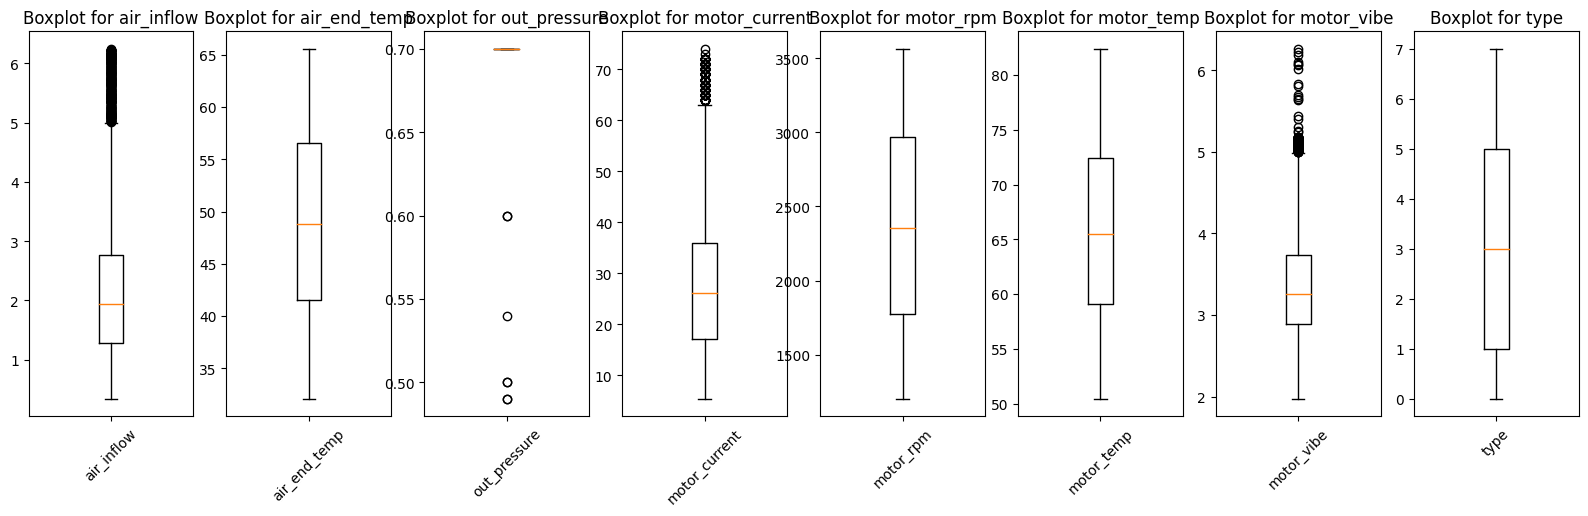

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성
#train_df = pd.read_csv('train.csv')

# Boxplot 그리기
fig, axs = plt.subplots(ncols=len(test.columns), figsize=(20, 5))

for i, column in enumerate(test.columns):
    axs[i].boxplot(test[column])
    axs[i].set_title(f'Boxplot for {column}')
    axs[i].set_xticklabels([column], rotation=45)

plt.show()

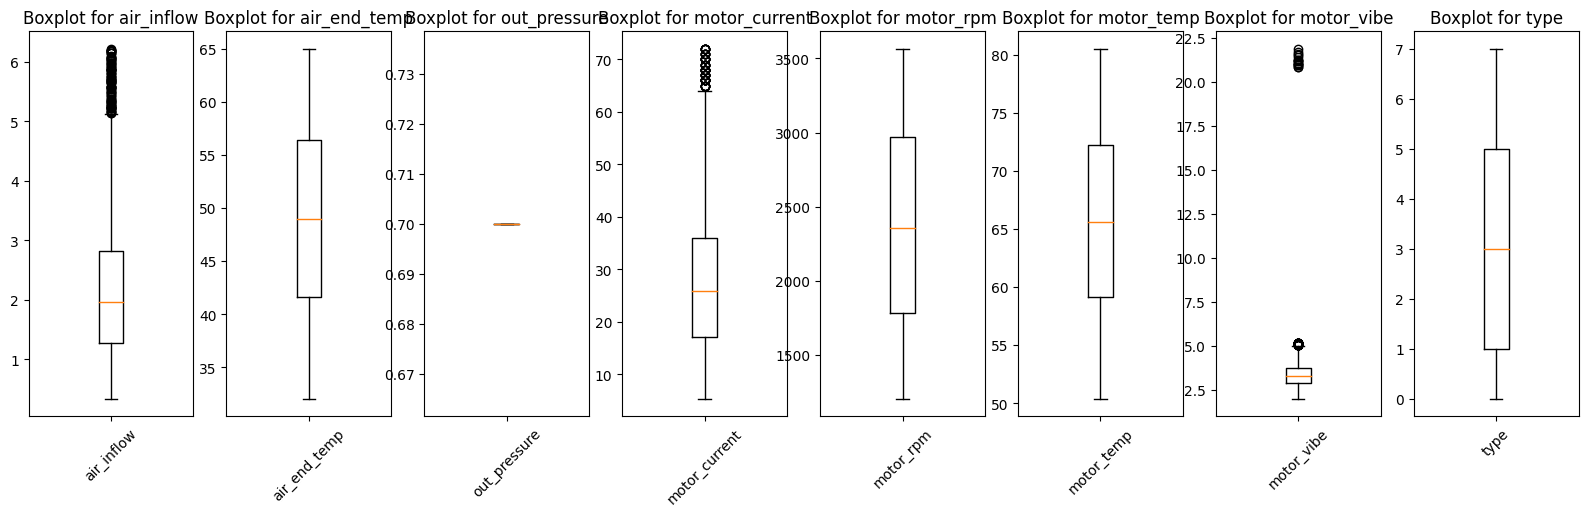

In [ ]:
fig, axs = plt.subplots(ncols=len(train.columns), figsize=(20, 5))

for i, column in enumerate(train.columns):
    axs[i].boxplot(train[column])
    axs[i].set_title(f'Boxplot for {column}')
    axs[i].set_xticklabels([column], rotation=45)

plt.show()
#air_inflow	air_end_temp	out_pressure	motor_current	motor_rpm	motor_temp	motor_vibe	type

In [ ]:
"""
train은 전부다 정상작동, test는 일부 고장이라고 가정할경우
고장에 영향을 주거나 받는 column은 out_pressure
"""

'\ntrain은 전부다 정상작동, test는 일부 고장이라고 가정할경우\n고장에 영향을 주거나 받는 column은 out_pressure\n'

###Pycaret AutoML

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting req

In [ ]:
# PyCaret anomaly detection 모듈 불러오기
from pycaret.anomaly import *

anomaly_detector = setup(data=test, normalize=True, session_id=69)
#anomaly_detector = setup(data=test, normalize=True, session_id=69, remove_outliers=True)

knn_model = create_model('knn')

pred_df = predict_model(knn_model, data=test)
pred_df


,Description,Value
0,Session id,69
1,Original data shape,"(7389, 8)"
2,Transformed data shape,"(7389, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,Anomaly,Anomaly_Score
0,0.349570,0.487848,0.029704,0.387062,0.419055,0.491978,0.208765,-1.326376,0,0.013290
1,0.478445,0.713509,0.029704,0.531396,0.647355,0.716757,0.348482,-1.326376,0,0.005417
2,-0.329171,-0.725652,0.029704,-0.392040,-0.806787,-0.718468,-0.520873,-1.326376,0,0.005057
3,0.083228,0.012350,0.029704,0.081769,-0.060812,0.017876,-0.070671,-1.326376,0,0.014028
4,-0.037055,-0.202949,0.029704,-0.056520,-0.278934,-0.197860,-0.210389,-1.326376,0,0.027839
...,...,...,...,...,...,...,...,...,...,...
7384,0.014495,-0.110842,0.029704,0.002423,-0.185868,-0.104848,-0.148292,1.813115,0,0.007424
7385,-0.535371,-1.083715,0.029704,-0.621765,-1.168869,-1.076305,-0.738212,1.813115,0,0.025429
7386,-0.466638,-0.970885,0.029704,-0.549220,-1.053991,-0.962624,-0.660591,1.813115,0,0.049211
7387,-0.440863,-0.927134,0.029704,-0.521260,-1.010367,-0.918702,-0.645066,1.813115,0,0.020096


In [ ]:
#pred_df.corr()

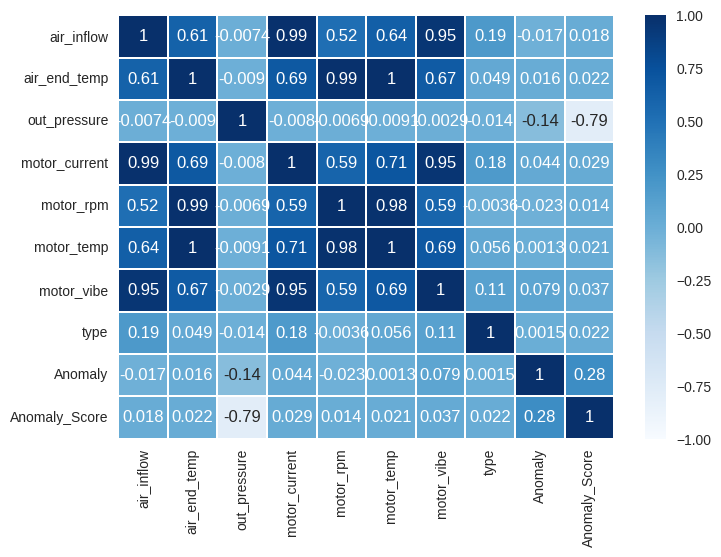

In [ ]:
sns.heatmap(pred_df.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='Blues')
plt.show()


In [ ]:
ans = f'{path}/answer_sample.csv'
ans_df = pd.read_csv(ans)

In [ ]:
pred_df['Anomaly'].value_counts()

0    6532
1     857
Name: Anomaly, dtype: int64

In [ ]:
ans = []
for i in pred_df['Anomaly']:
    ans.append(i)


In [ ]:
ans_df['label'] = ans

In [ ]:
ans_df['label'].value_counts()

0    7059
1     330
Name: label, dtype: int64

In [1]:
ans_df.to_csv('answer.csv', index=False)

NameError: ignored